# Part II - Loan Data from Prosper
## by Gabriel Michael O.

## Investigation Overview

   - An overwhelming majority of the loans under consideration were medium or long-term.
   - `Debt Consolidation` was the most prominent reason for loan collection.


## Dataset Overview

This data set contained 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. However, a subset of the dataset consisting of 15 variables was carved out to inspect, analyze and draw conclusions from. The variables used had the following description as gotten from [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0_):

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
#Load the prosper data as a whole. 
tentative_loan_data = pd.read_csv('prosperLoanData.csv')

In [4]:
#define columns to be used.
used_columns = ['ListingCreationDate', 'LoanStatus', 'CreditGrade', 'Term',
                'ProsperRating (numeric)', 'ProsperScore', 'Occupation', 'ListingCategory (numeric)',
                'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'BorrowerState', 'StatedMonthlyIncome',
                'LoanOriginalAmount','IncomeVerifiable','DebtToIncomeRatio']

In [5]:
loan_data = tentative_loan_data[used_columns].query('IncomeVerifiable == True').copy()

In [6]:
listing_cat = {0:'Not Available',
               1 :'Debt Consolidation', 
               2 : 'Home Improvement',
               3 : 'Business',
               4 : 'Personal Loan',
               5 : 'Student Use', 
               6 : 'Auto', 
               7 : 'Other', 
               8 : 'Baby & Adoption', 
               9 : 'Boat', 
               10 : 'Cosmetic Procedure', 
               11 : 'Engagement Ring', 
               12 : 'Green Loans', 
               13 : 'Household Expenses', 
               14 : 'Large Purchases', 
               15 : 'Medical/Dental', 
               16 : 'Motorcycle', 
               17 : 'RV', 
               18 : 'Taxes', 
               19 : 'Vacation', 
               20 : 'Wedding Loans'
              }

In [7]:
loan_data['ListingCategory'] = loan_data['ListingCategory (numeric)'].map(listing_cat).astype('category')

In [8]:
#Replace necessary values
loan_data['LoanStatus'] = (loan_data['LoanStatus'].replace('FinalPaymentInProgress', 'Completed')
                           .replace('Cancelled', 'Completed')
                           .replace('Chargedoff', 'Defaulted')
                           .replace('Past Due (1-15 days)', 'Defaulted')
                           .replace('Past Due (31-60 days)', 'Defaulted')
                           .replace('Past Due (61-90 days)', 'Defaulted')
                           .replace('Past Due (16-30 days)', 'Defaulted')
                           .replace('Past Due (91-120 days)', 'Defaulted')
                           .replace('Past Due (>120 days)', 'Defaulted')
                          )

In [9]:
credit_map = {0:'N/A',
              1:'HR', 
              2:'E', 
              3:'D',
              4:'C',
              5:'B',
              6:'A',
              7:'AA'
             }

In [10]:
loan_data['ProsperRating (numeric)'] = loan_data['ProsperRating (numeric)'].map(credit_map).astype('category')

In [11]:
loan_data['ListingCreationDate'] = pd.to_datetime(loan_data['ListingCreationDate'])
loan_data['LoanStatus'] = loan_data['LoanStatus'].astype('category')

In [12]:
sns.set_style(style='darkgrid')

In [35]:
def showplotCat(df=loan_data, col_name='CreditGrade', norm=True, kind='bar', rotation=0):
    """
    Create a two plots side by side for a given categorical variable.
    
    """
    mask_grade = df['LoanStatus'] == 'Completed'
    mask_ungrade = df['LoanStatus'] == 'Defaulted'
    
    plt.figure(figsize=[15, 6])

    plt.subplot(1, 2, 1)
    (df[mask_grade][col_name].value_counts(normalize=norm)*100).head().plot(kind, color='tab:blue')
    plt.title('Distribution of {}(Completed)'.format(col_name))
    if norm:
        plt.ylabel('Percentage of Loanees')
    else:
        plt.ylabel('No of Loanees')
    plt.xlabel('{}'.format(col_name))
    plt.xticks(rotation=rotation)

    plt.subplot(1, 2, 2)
    (df[mask_ungrade][f'{col_name}'].value_counts(normalize=norm)*100).head().plot(kind, color='tab:blue')
    plt.title('Distribution of {}(Defaulters)'.format(col_name))
    if norm:
        plt.ylabel('Percentage of Loanees')
    else:
        plt.ylabel('No of Loanees')    
    plt.xlabel('{}'.format(col_name))
    plt.xticks(rotation=rotation);

### What is the distribution of Credit Grade among Loanee categories?

 it's seen that an ovewhelming majority of loanees with "Completed" loan repayment status are in the `C`, `D`, and `B` categotries, with defaulters having `HR` as their most dominant category. How about data post 2009?

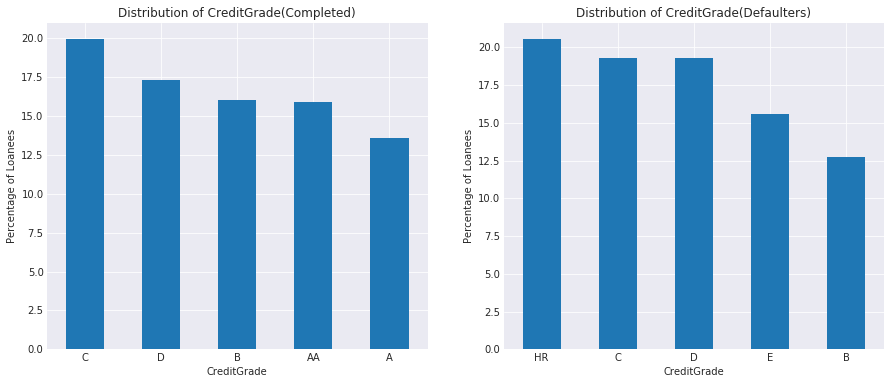

In [36]:
showplotCat()

### What is the distribution of Credit Grade among Loanee categories(Post 2009)?
Again, we see that on a more general note, defaulters tended to have a lower credit rating. Next is loan terms.

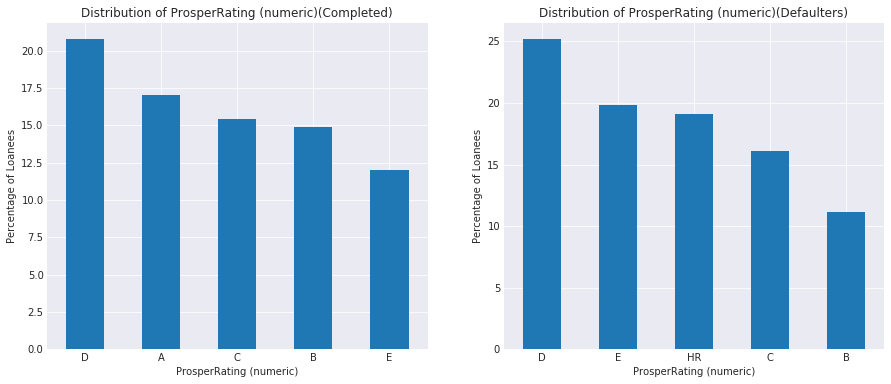

In [37]:
showplotCat(col_name='ProsperRating (numeric)')

### What is the distribution of Loan term(months) among loanees?
An overwhelming majority of the loans under consideration were for 36 months, which if coupled with the 60 months figures ensures that MOST of the loans were medium or long-term. There really is no major difference between the two, bar that, defaulters tended not to borrow as much short term loans as those who adherred to payments. Side question: What were they using the loans for? as funds used for consumption tend to be short term in nature, while long term loans are generally believed to be for investment(Mortgage, Business etc.)

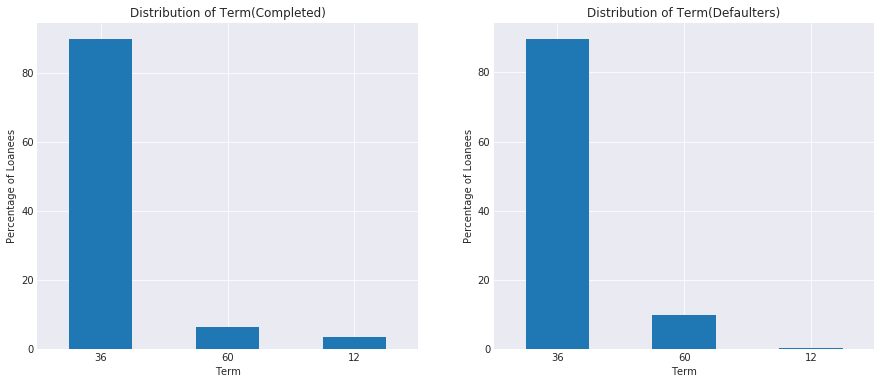

In [38]:
showplotCat(col_name='Term')

### What was the most prominent reason for loan?
`Debt Consolidation` was the most prominent reason for loan collection.

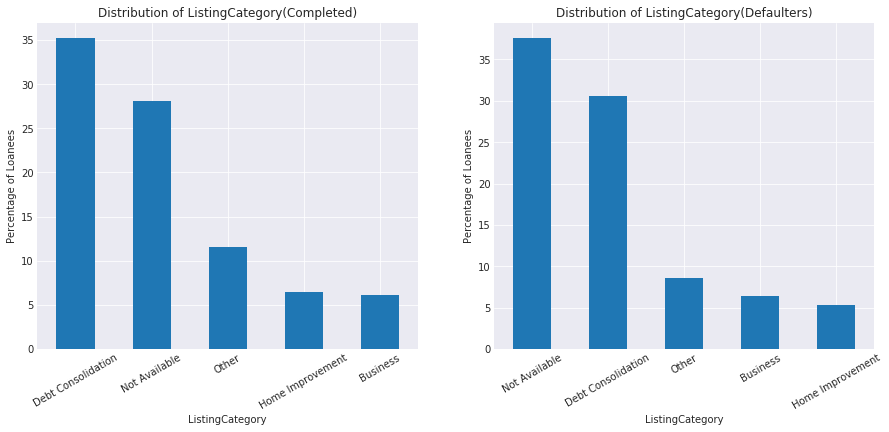

In [39]:
showplotCat(col_name='ListingCategory', kind='bar', rotation=30)

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [41]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 391738 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not 

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
